In [97]:
import pandas as pd
import numpy as np

In [98]:
df=pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [99]:
df=df.drop(columns=['id','Unnamed: 32'])

In [100]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [101]:
df.shape

(569, 31)

In [102]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=2)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
X_train=S.fit_transform(X_train)
X_test=S.transform(X_test)

In [113]:
KNN=KNeighborsClassifier(n_neighbors=3)
model=KNN.fit(X_train,y_train)

In [114]:

from sklearn.metrics import accuracy_score,r2_score
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

99.12280701754386


In [116]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=20,shuffle=True)
cv_scores_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.9628458498023715
0.9583333333333334


In [107]:
y_train.head()

,diagnosis
560,B
428,B
198,M
203,M
41,M


In [108]:
# from sklearn.preprocessing import LabelEncoder
# L= LabelEncoder()
# y_test=L.fit_transform(y_test)
# y_train=L.fit_transform(y_train)
# y_test

In [109]:
# from sklearn.linear_model import LogisticRegression
# lr=LogisticRegression(max_iter=100000)
# model=lr.fit(X_train,y_train)

# from sklearn.metrics import accuracy_score
# y_pred=model.predict(X_test)
# print(accuracy_score(y_test,y_pred)*100)

# from sklearn.model_selection import KFold
# kf=KFold(n_splits=10,shuffle=True)
# cv_scores_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
# training_cv_score = np.mean(cv_scores_train)
# # Calculate test CV score
# cv_scores_test = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')
# test_cv_score = np.mean(cv_scores_test)
# print(training_cv_score)
# print(test_cv_score)

In [110]:
score=[]
for i in range(1,16):
  KNN=KNeighborsClassifier(n_neighbors=i)
  model=KNN.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  score.append(accuracy_score(y_test,y_pred)*100)

In [111]:
score

[95.6140350877193,
 97.36842105263158,
 99.12280701754386,
 97.36842105263158,
 97.36842105263158,
 97.36842105263158,
 97.36842105263158,
 97.36842105263158,
 97.36842105263158,
 97.36842105263158,
 97.36842105263158,
 97.36842105263158,
 97.36842105263158,
 96.49122807017544,
 96.49122807017544]

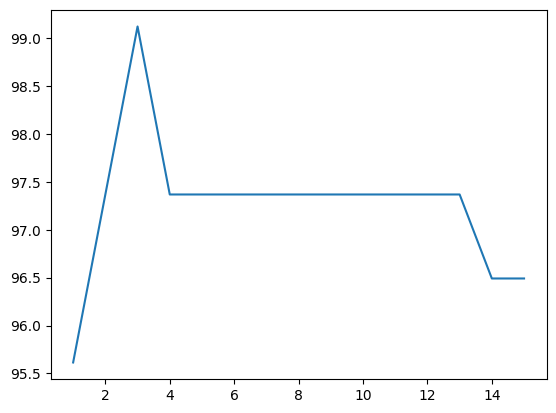

In [112]:
import matplotlib.pyplot as plt
plt.plot(range(1,16),score)

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, fixed

def load_data():
    cancer = datasets.load_breast_cancer()
    return cancer

def plot_decision_boundaries(n_neighbors, data, labels):
    h = .02
    cmap_light = ListedColormap(['orange', 'blue'])
    cmap_bold = ListedColormap(['darkorange', 'darkblue'])

    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(data, labels)
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'2-Class classification (k = {n_neighbors})')
    plt.show()
cancer = load_data()

# Use only the first two features and standardize them.
X = StandardScaler().fit_transform(cancer.data[:, :2])
y = cancer.target

# Interactive widget
interact(plot_decision_boundaries, n_neighbors=(1, 20), data=fixed(X), labels=fixed(y));

interactive(children=(IntSlider(value=10, description='n_neighbors', max=20, min=1), Output()), _dom_classes=(…

#`KNN without inbuild library`

In [234]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [235]:
df=df.drop(columns='User ID')

In [236]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
df['Gender']=L.fit_transform(df['Gender'])

In [237]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=0)

In [238]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
X_train=S.fit_transform(X_train)
X_test=S.transform(X_test)

In [138]:
X_train[:1]

array([[1.02532046, 1.92295008, 2.14601566]])

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
KNN=KNeighborsClassifier(n_neighbors=5)
model=KNN.fit(X_train,y_train)
from sklearn.metrics import accuracy_score,r2_score
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

95.0


In [140]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=20,shuffle=True)
cv_scores_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.89375
0.8875


In [239]:
import numpy as np
from collections import Counter
class my_KNN_class:
  def __init__(self,k):
    self.n_neighbors=k
    self.X_train=None
    self.y_train=None
  def fit(self,X_train,y_train):
    self.X_train=np.array(X_train)
    self.y_train=np.array(y_train)
  def prediction(self,X_test):
    y_pred=[]
    for i in X_test:
      distances=[]
      for j in self.X_train:
        distances.append(self.calculate_distances(i,j))
      n_neighbors=sorted(list(enumerate(distances)),key=lambda x:x[1])[0:self.n_neighbors]
      lable=self.majority_count(n_neighbors)
      y_pred.append(lable)
    return np.array(y_pred)
  def calculate_distances(self,point_A,point_B):
    return np.linalg.norm(point_A-point_B)
  def majority_count(self,neighbors):
    votes=[]
    for i in neighbors:
      votes.append(self.y_train[i[0]])
    votes=Counter(votes)
    return votes.most_common()[0][0]

In [244]:
KNN=my_KNN_class(100)
KNN.fit(X_train,y_train)
y_pred=KNN.prediction(X_test)
print(accuracy_score(y_pred,y_test))

0.8625


In [ ]:
import numpy as np
from collections import Counter

class Knn:

    def __init__(self,k=5):
        self.n_neighbors = k
        self.X_train = None
        self.y_train = None

    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self,X_test):

        y_pred = []

        for i in X_test:
            # calculate distance with each training point
            distances = []
            for j in self.X_train:
                distances.append(self.calculate_distance(i,j))
            n_neighbors = sorted(list(enumerate(distances)),key=lambda x:x[1])[0:self.n_neighbors]
            label = self.majority_count(n_neighbors)
            y_pred.append(label)
        return np.array(y_pred)

    def calculate_distance(self,point_A,point_B):
        return np.linalg.norm(point_A - point_B)

    def majority_count(self,neighbors):
        votes = []
        for i in neighbors:
            votes.append(self.y_train[i[0]])
        votes = Counter(votes)

        return votes.most_common()[0][0]